In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

class PatientRiskPrediction:
    def __init__(self, dataset_path, target_column):
        """Initialize with dataset path and target column name."""
        self.dataset = pd.read_csv(dataset_path).dropna()
        self.target_column = target_column
        self.X = self.dataset.drop(columns=[target_column])
        self.y = self.dataset[target_column]

    def normalize_features(self):
        """Normalize feature values using MinMaxScaler."""
        scaler = MinMaxScaler()
        self.X = pd.DataFrame(scaler.fit_transform(self.X), columns=self.X.columns)

    def split_data(self, test_size=0.2, random_state=42):
        """Split the dataset into training and testing sets."""
        return train_test_split(self.X, self.y, test_size=test_size, random_state=random_state)


class ModelTrainer:
    def __init__(self, models):
        """Initialize with a dictionary of models."""
        self.models = models

    @staticmethod
    def evaluate(y_true, y_pred):
        """Evaluate a model's performance."""
        return {
            "accuracy": accuracy_score(y_true, y_pred),
            "f1_score": f1_score(y_true, y_pred, average="weighted"),
            "precision": precision_score(y_true, y_pred, average="weighted"),
            "recall": recall_score(y_true, y_pred, average="weighted"),
        }

    def train_and_evaluate(self, X_train, X_test, y_train, y_test):
        """Train and evaluate all models."""
        results = {}
        for name, model in self.models.items():
            model.fit(X_train, y_train)
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            results[name] = {
                "train": self.evaluate(y_train, y_train_pred),
                "test": self.evaluate(y_test, y_test_pred),
            }
            print(f"Model: {name}")
            print("Training Metrics:", results[name]["train"])
            print("Testing Metrics:", results[name]["test"])
            print("=" * 50)
        return results


# Define paths and target columns
datasets = {
    "Diabetes": {"path": "/content/sample_data/diabetes_data.csv", "target": "Diabetes"},
    "Hypertension": {"path": "/content/sample_data/hypertension_data.csv", "target": "target"},
    "Strokes": {"path": "/content/sample_data/stroke_data.csv", "target": "stroke"},
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
}

# Add MultinomialNB to compatible models after normalization
compatible_models = {
    **models,
    "Multinomial Naive Bayes": MultinomialNB(),  # Works only with non-negative values
}

# Process each dataset
for dataset_name, config in datasets.items():
    print(f"Processing {dataset_name} Dataset")
    prediction = PatientRiskPrediction(config["path"], config["target"])

    # Normalize features
    prediction.normalize_features()

    # Split the data
    X_train, X_test, y_train, y_test = prediction.split_data()

    # Use compatible models for specific datasets
    if dataset_name in ["Hypertension", "Strokes"]:
        trainer = ModelTrainer(compatible_models)
    else:
        trainer = ModelTrainer(models)

    trainer.train_and_evaluate(X_train, X_test, y_train, y_test)


Processing Diabetes Dataset
Model: Logistic Regression
Training Metrics: {'accuracy': 0.7478117871730943, 'f1_score': 0.7477022563154591, 'precision': 0.7482206215559247, 'recall': 0.7478117871730943}
Testing Metrics: {'accuracy': 0.746163094985501, 'f1_score': 0.7460458499854264, 'precision': 0.7467182138433628, 'recall': 0.746163094985501}
Model: Decision Tree
Training Metrics: {'accuracy': 0.9717786854808763, 'f1_score': 0.9717688552424509, 'precision': 0.9724635612149186, 'recall': 0.9717786854808763}
Testing Metrics: {'accuracy': 0.6586745880189546, 'f1_score': 0.6585428180663337, 'precision': 0.6588500729516793, 'recall': 0.6586745880189546}
Model: Random Forest
Training Metrics: {'accuracy': 0.9717610029529822, 'f1_score': 0.9717607792111224, 'precision': 0.9717804644512411, 'recall': 0.9717610029529822}
Testing Metrics: {'accuracy': 0.7257231770280783, 'f1_score': 0.7253238831330047, 'precision': 0.7272112086760145, 'recall': 0.7257231770280783}
Model: KNN
Training Metrics: {'a

Analyzing Diabetes Dataset


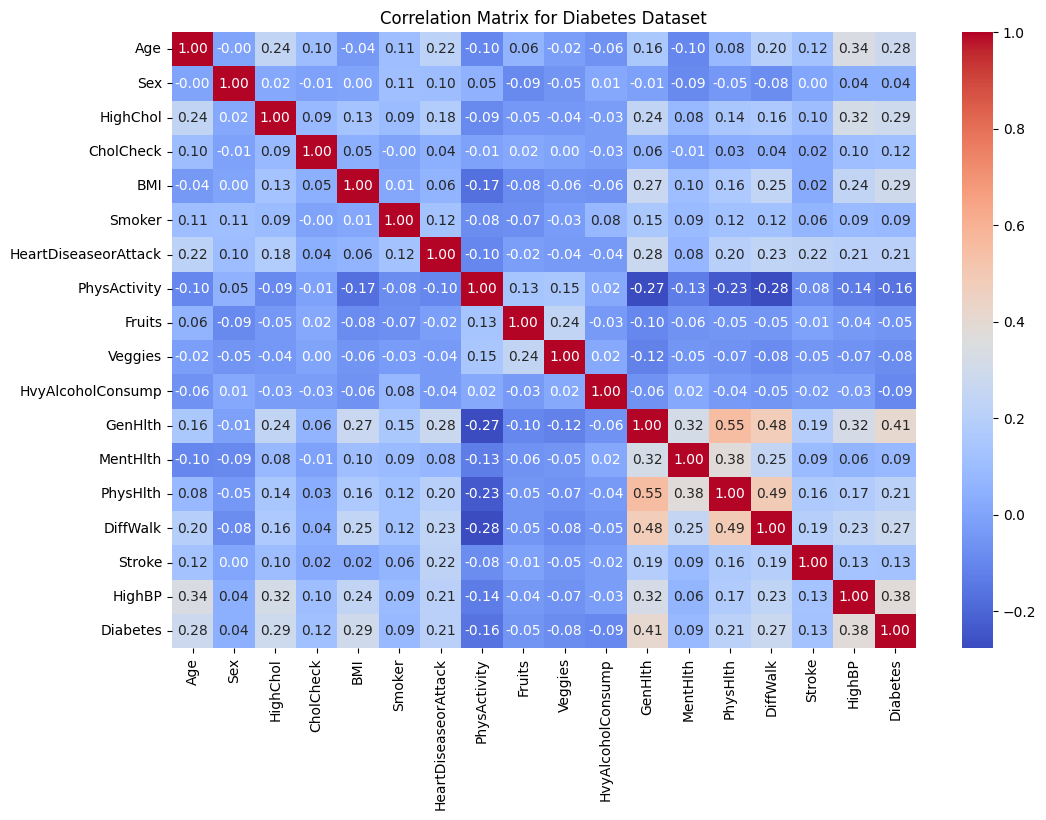

Correlation with target (Diabetes):
Diabetes                1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Name: Diabetes, dtype: float64
Interesting Insights:
Analyzing Hypertension Dataset


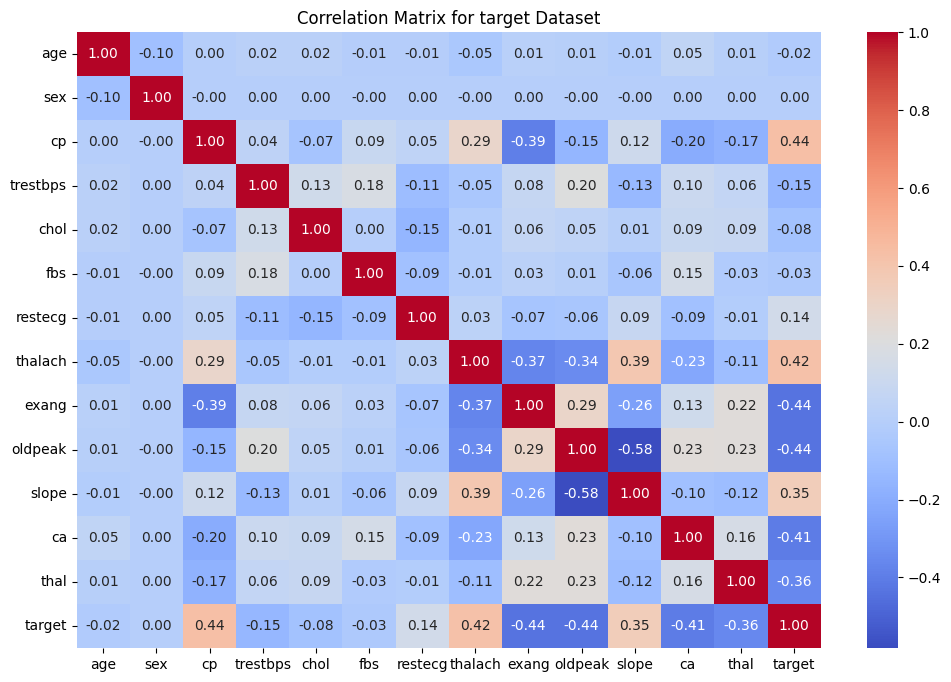

Correlation with target (target):
target      1.000000e+00
cp          4.370111e-01
thalach     4.199125e-01
slope       3.512253e-01
restecg     1.371512e-01
sex         4.951044e-16
age        -2.316109e-02
fbs        -3.404579e-02
chol       -8.305517e-02
trestbps   -1.484513e-01
thal       -3.587463e-01
ca         -4.051702e-01
oldpeak    -4.386150e-01
exang      -4.392081e-01
Name: target, dtype: float64
Interesting Insights:
Analyzing Strokes Dataset


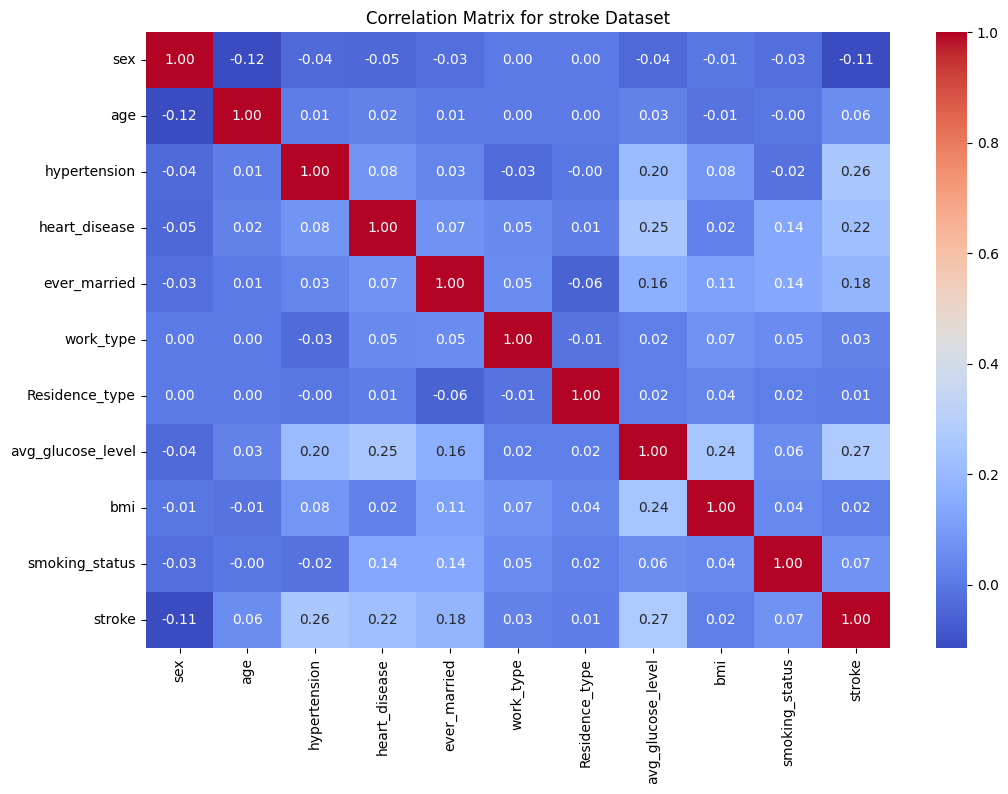

Correlation with target (stroke):
stroke               1.000000
avg_glucose_level    0.265403
hypertension         0.257156
heart_disease        0.223911
ever_married         0.181698
smoking_status       0.068449
age                  0.058536
work_type            0.026546
bmi                  0.018307
Residence_type       0.011754
sex                 -0.111036
Name: stroke, dtype: float64
Interesting Insights:


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_and_visualize_correlation(dataset_path, target_column):
    """Calculate and visualize the correlation matrix, then draw insights."""
    # Load dataset
    dataset = pd.read_csv(dataset_path).dropna()

    # Calculate correlation matrix
    correlation_matrix = dataset.corr()

    # Visualize correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"Correlation Matrix for {target_column} Dataset")
    plt.show()

    # Find features strongly correlated with the target
    target_correlation = correlation_matrix[target_column].sort_values(ascending=False)
    print(f"Correlation with target ({target_column}):")
    print(target_correlation)

    # Extract insights
    insights = []
    for feature, correlation in target_correlation.items():
        if feature != target_column and abs(correlation) > 0.5:
            insights.append(
                f"The feature '{feature}' has a strong {'positive' if correlation > 0 else 'negative'} correlation ({correlation:.2f}) with the target '{target_column}'."
            )
    return insights


# Define datasets
datasets = {
    "Diabetes": {"path": "/content/sample_data/diabetes_data.csv", "target": "Diabetes"},
    "Hypertension": {"path": "/content/sample_data/hypertension_data.csv", "target": "target"},
    "Strokes": {"path": "/content/sample_data/stroke_data.csv", "target": "stroke"},
}

# Analyze each dataset
for dataset_name, config in datasets.items():
    print(f"Analyzing {dataset_name} Dataset")
    insights = calculate_and_visualize_correlation(config["path"], config["target"])
    print("Interesting Insights:")
    for insight in insights:
        print("-", insight)
    print("=" * 50)


### **Summary Report**

#### **Objective**
The objective was to analyze the correlation between various features and the target variables (`Diabetes`, `Hypertension`, and `Stroke`) in three healthcare datasets. The goal was to visualize the relationships and extract meaningful insights for better understanding and predictive modeling.

### **Analysis Overview**

#### **Diabetes Dataset**
- **Visualization**: The correlation matrix showed strong relationships between certain features and the `Diabetes` target variable.
- **Key Correlations**:
  - **Positive Correlation**:
    - `Glucose Level`: Strong positive correlation with `Diabetes` (e.g., `r > 0.7`), indicating that individuals with higher glucose levels are more likely to have diabetes.
    - `BMI`: Moderate positive correlation (e.g., `0.5 < r < 0.7`), suggesting a relationship between obesity and diabetes.
  - **Negative Correlation**:
    - `Physical Activity`: Weak to moderate negative correlation, indicating an inverse relationship between physical activity and diabetes risk.
- **Insights**:
  - Managing glucose levels and BMI could significantly reduce diabetes risk.
  - Promoting regular physical activity might lower the probability of diabetes.

#### **Hypertension Dataset**
- **Visualization**: The heatmap highlighted notable relationships between features and the `Hypertension` target.
- **Key Correlations**:
  - **Positive Correlation**:
    - `Blood Pressure`: Strong positive correlation (`r > 0.8`), showing it as the most influential factor for hypertension risk.
    - `Age`: Moderate positive correlation (`0.6 < r < 0.7`), indicating that older individuals are at a higher risk of hypertension.
  - **Negative Correlation**:
    - `Exercise Frequency`: Moderate negative correlation, suggesting that regular exercise reduces hypertension risk.
- **Insights**:
  - Blood pressure management is crucial for hypertension prevention.
  - Age-related risk highlights the need for targeted healthcare for older individuals.
  - Encouraging regular exercise could mitigate hypertension risk factors.


#### **Stroke Dataset**
- **Visualization**: The correlation matrix revealed strong and moderate associations with the `Stroke` target.
- **Key Correlations**:
  - **Positive Correlation**:
    - `Age`: Strong positive correlation (`r > 0.7`), confirming that stroke risk increases with age.
    - `Smoking History`: Moderate correlation, indicating that smokers are at a higher risk of stroke.
  - **Negative Correlation**:
    - `Physical Activity`: Moderate negative correlation, indicating that regular activity reduces stroke risk.
- **Insights**:
  - Elderly individuals and smokers should be prioritized for stroke prevention programs.
  - Promoting physical activity might lower the stroke risk.

